# Breast cancer prediction
## Kaggle 


### Load Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors 
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

/Users/girlswhocode/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load the Data 

In [3]:
df = pd.read_csv("data/data.csv",header = 0)
df.head()

/Users/girlswhocode/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/girlswhocode/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Clean and Prepare Data 

In [4]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
# size of the dataframe
len(df)

569

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# We are dealing with two classes of diagnosis 
# replace M and D with O and 1, respectively 
# M (1) - Malignant 
# B (0) - Benign 

df.diagnosis.unique()
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#describe the data
#this dataset includes no missing data 

print(df.describe())

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

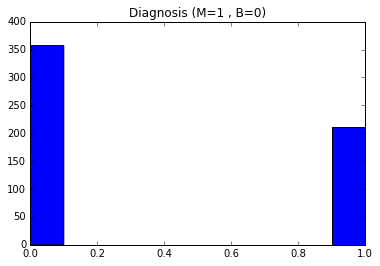

In [8]:
#this shows us that of the 569 people about 350 had a benign diagnosis and the rest malignant
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

In [9]:
#our list of columns
#we will only be concerned with those "*_mean" - column range 1 : 11 
print(list(df.columns))
print(len(list(df.columns)))

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
31


In [10]:
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1] ##malignant filter
dfB=df[df['diagnosis'] ==0] ##bengign filter
dfM.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


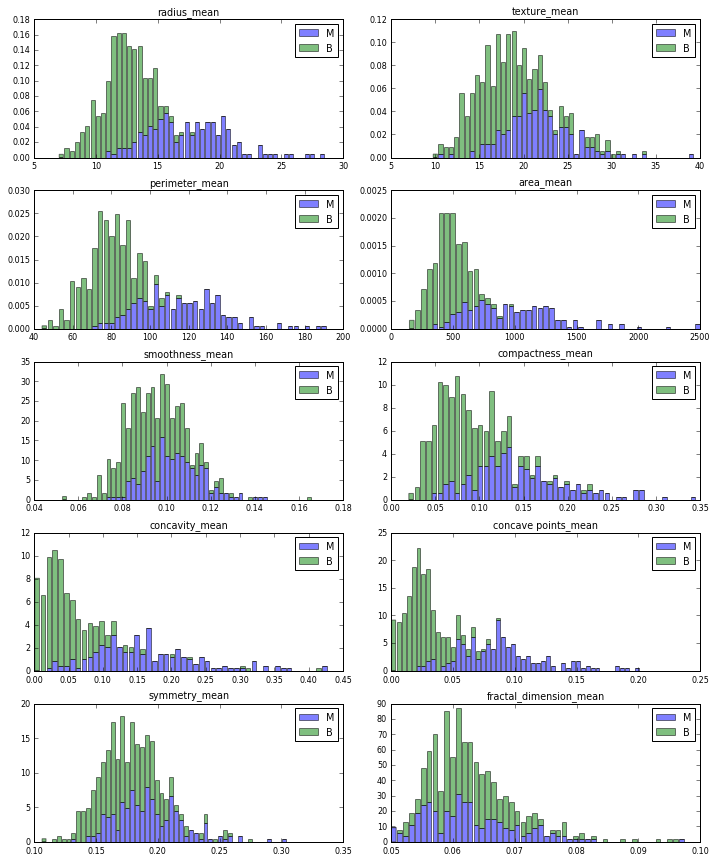

In [91]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,12))
axes = axes.ravel()

for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['b','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

### Observations
From looking at these plots, we can see that cell radius, perimeter area, compactness
and concave points can be used in our classification. Larger values of these indicators
show a correlation with malignant tumors. 




### Feature Selecton 

Confirming our observations with feature selection - ExtraTreesClassifier


In [45]:
#Dimensionality Reduction -> Feature Selection 
#use random forests and extra trees
from sklearn.ensemble import ExtraTreesClassifier 

#get column values
feat_labels = df.columns.values[1:]
print(feat_labels)
array = df.values
X = array[:,1:] #features- only select mean features 
Y = array[:,0] # class label   
# feature extraction
model = ExtraTreesClassifier(n_estimators=10000,random_state=0,n_jobs=-1) 
model.fit(X, Y)
importances = model.feature_importances_ 

print importances


['radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean' 'radius_se'
 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se' 'compactness_se'
 'concavity_se' 'concave points_se' 'symmetry_se' 'fractal_dimension_se'
 'radius_worst' 'texture_worst' 'perimeter_worst' 'area_worst'
 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']
[ 0.05738339  0.02006107  0.06184218  0.05250196  0.0102656   0.02438463
  0.05426292  0.08417356  0.00769441  0.00639132  0.0214332   0.00560996
  0.01993623  0.03280912  0.00612277  0.00762946  0.00876996  0.00995193
  0.00575104  0.00601056  0.08510522  0.02676657  0.08806105  0.07750387
  0.01978046  0.02749643  0.04734707  0.09969679  0.01495601  0.01030129]


In [46]:
# get our indices in sorted order 

indices = np.argsort(importances)[::-1] 
indices

array([27, 22, 20,  7, 23,  2,  0,  6,  3, 26, 13, 25, 21,  5, 10,  1, 12,
       24, 28, 29,  4, 17, 16,  8, 15,  9, 14, 19, 18, 11])

#### Our ranked features... 

In [17]:
#X.shape is tuple of array dimension 
X.shape[1] ##cols 
for f in range(X.shape[1]):
#     print feat_labels[f] 
#     print indices[f]
#     print importances[indices[f]]

    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

    


 1) concave points_worst           0.099697
 2) perimeter_worst                0.088061
 3) radius_worst                   0.085105
 4) concave points_mean            0.084174
 5) area_worst                     0.077504
 6) perimeter_mean                 0.061842
 7) radius_mean                    0.057383
 8) concavity_mean                 0.054263
 9) area_mean                      0.052502
10) concavity_worst                0.047347
11) area_se                        0.032809
12) compactness_worst              0.027496
13) texture_worst                  0.026767
14) compactness_mean               0.024385
15) radius_se                      0.021433
16) texture_mean                   0.020061
17) perimeter_se                   0.019936
18) smoothness_worst               0.019780
19) symmetry_worst                 0.014956
20) fractal_dimension_worst        0.010301
21) smoothness_mean                0.010266
22) concave points_se              0.009952
23) concavity_se                

#### bar graph of features

In [48]:
#reorder our lables 
print(feat_labels)
print(indices) 
features = list(map(lambda x : feat_labels[x],indices))
feature_labels = features[0:10]
print feature_labels

['radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean' 'radius_se'
 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se' 'compactness_se'
 'concavity_se' 'concave points_se' 'symmetry_se' 'fractal_dimension_se'
 'radius_worst' 'texture_worst' 'perimeter_worst' 'area_worst'
 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']
[27 22 20  7 23  2  0  6  3 26 13 25 21  5 10  1 12 24 28 29  4 17 16  8 15
  9 14 19 18 11]
['concave points_worst', 'perimeter_worst', 'radius_worst', 'concave points_mean', 'area_worst', 'perimeter_mean', 'radius_mean', 'concavity_mean', 'area_mean', 'concavity_worst']


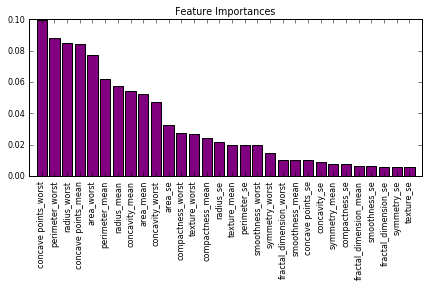

In [65]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices],color="purple",align="center")
plt.xticks(range(X.shape[1]),features, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

#### Feature selection conclusion
We can now coclude that "concave point mean" is the most dicriminative 
feature in our data set. Other features like, concavity mean, perimeter mean,
radius mean and area mean also show importance. We will use the top 10 features 
in our classifiers. 

### Create Test Set and Training Set
Splits our data into two 

70% traindf (398)

30% testdf (171)

In [50]:
traindf,testdf = train_test_split(df,test_size=0.3)

### Model Classification 


In [123]:
#Generic function for making a classification model and accessing the performance. 
# From AnalyticsVidhya tutorial
def classification_model(model, data, predictors, outcome):
#Fit the model:
    model.fit(data[predictors],data[outcome])

    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    #print confusion matrix
#     confusion_matrix = metrics.confusion_matrix(predictions,data[outcome]);
#     print(confusion_matrix)
    
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    

    #Perform k-fold cross-validation with 10 folds
    kf = KFold(data.shape[0], n_folds=10)
    
    
    error = []
  
    for train, test in kf:
    
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
        

        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        
#         print(data[predictors].iloc[test,:])
#         print(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))

        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])
    return accuracy 
   


### Logistic Regression model 
based on our feature selection procedure we know that concavity mean, perimeter mean, 
radius mean and area mean are the most important features. 



In [124]:
model = LogisticRegression()
classification_model(model,traindf,feature_labels,'diagnosis')
print(feature_labels)


Accuracy : 95.226%
Cross-Validation Score : 92.500%
Cross-Validation Score : 93.750%
Cross-Validation Score : 92.500%
Cross-Validation Score : 93.125%
Cross-Validation Score : 93.500%
Cross-Validation Score : 94.167%
Cross-Validation Score : 94.286%
Cross-Validation Score : 94.375%
Cross-Validation Score : 94.430%
Cross-Validation Score : 94.987%
['concave points_worst', 'perimeter_worst', 'radius_worst', 'concave points_mean', 'area_worst', 'perimeter_mean', 'radius_mean', 'concavity_mean', 'area_mean', 'concavity_worst']


### KNN 


In [138]:
#Generic function for making a classification model and accessing the performance. 
# From AnalyticsVidhya tutorial
def best_k(model, data, predictors, outcome):
#Fit the model:

    
    model.fit(data[predictors],data[outcome])

    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])

    return accuracy 
   


In [180]:
from sklearn.neighbors import KNeighborsClassifier
#model = neighbors.KNeighborsRegressor(n_neighbors=2)
best = 0;
n=0;
for k in range(2,len(traindf)): 
    mod = KNeighborsClassifier(n_neighbors=k)
    top = best_k(mod,traindf,feature_labels,'diagnosis')
    if(top>best):
        best=top
        n=k

print "number of neighbors: ", n 
        
model = KNeighborsClassifier(n_neighbors=n)
classification_model(model,traindf,feature_labels,'diagnosis')



number of neighbors:  5
Accuracy : 94.975%
Cross-Validation Score : 95.000%
Cross-Validation Score : 96.250%
Cross-Validation Score : 94.167%
Cross-Validation Score : 93.125%
Cross-Validation Score : 92.500%
Cross-Validation Score : 93.750%
Cross-Validation Score : 93.214%
Cross-Validation Score : 93.438%
Cross-Validation Score : 93.597%
Cross-Validation Score : 94.237%


0.94974874371859297

### Decision Trees 


In [171]:
model = DecisionTreeClassifier()
classification_model(model,traindf,feature_labels,'diagnosis')



Accuracy : 100.000%
Cross-Validation Score : 92.500%
Cross-Validation Score : 93.750%
Cross-Validation Score : 92.500%
Cross-Validation Score : 93.125%
Cross-Validation Score : 91.500%
Cross-Validation Score : 92.083%
Cross-Validation Score : 92.500%
Cross-Validation Score : 92.500%
Cross-Validation Score : 92.194%
Cross-Validation Score : 92.718%


1.0

In [160]:
traindf.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
179,0,12.81,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.01330,0.1466,...,13.63,16.15,86.70,570.7,0.11620,0.05445,0.02758,0.03990,0.1783,0.07319
390,0,10.26,12.22,65.75,321.6,0.09996,0.07542,0.019230,0.01968,0.1800,...,11.38,15.65,73.23,394.5,0.13430,0.16500,0.08615,0.06696,0.2937,0.07722
298,0,14.26,18.17,91.22,633.1,0.06576,0.05220,0.024750,0.01374,0.1635,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
474,0,10.88,15.62,70.41,358.9,0.10070,0.10690,0.051150,0.01571,0.1861,...,11.94,19.35,80.78,433.1,0.13320,0.38980,0.33650,0.07966,0.2581,0.10800


#### Visualization
Below we have our decision tree diagram.
Class = 0 is benign
Class = 1 is malignant 

In [56]:
from IPython.display import Image 
import pydotplus

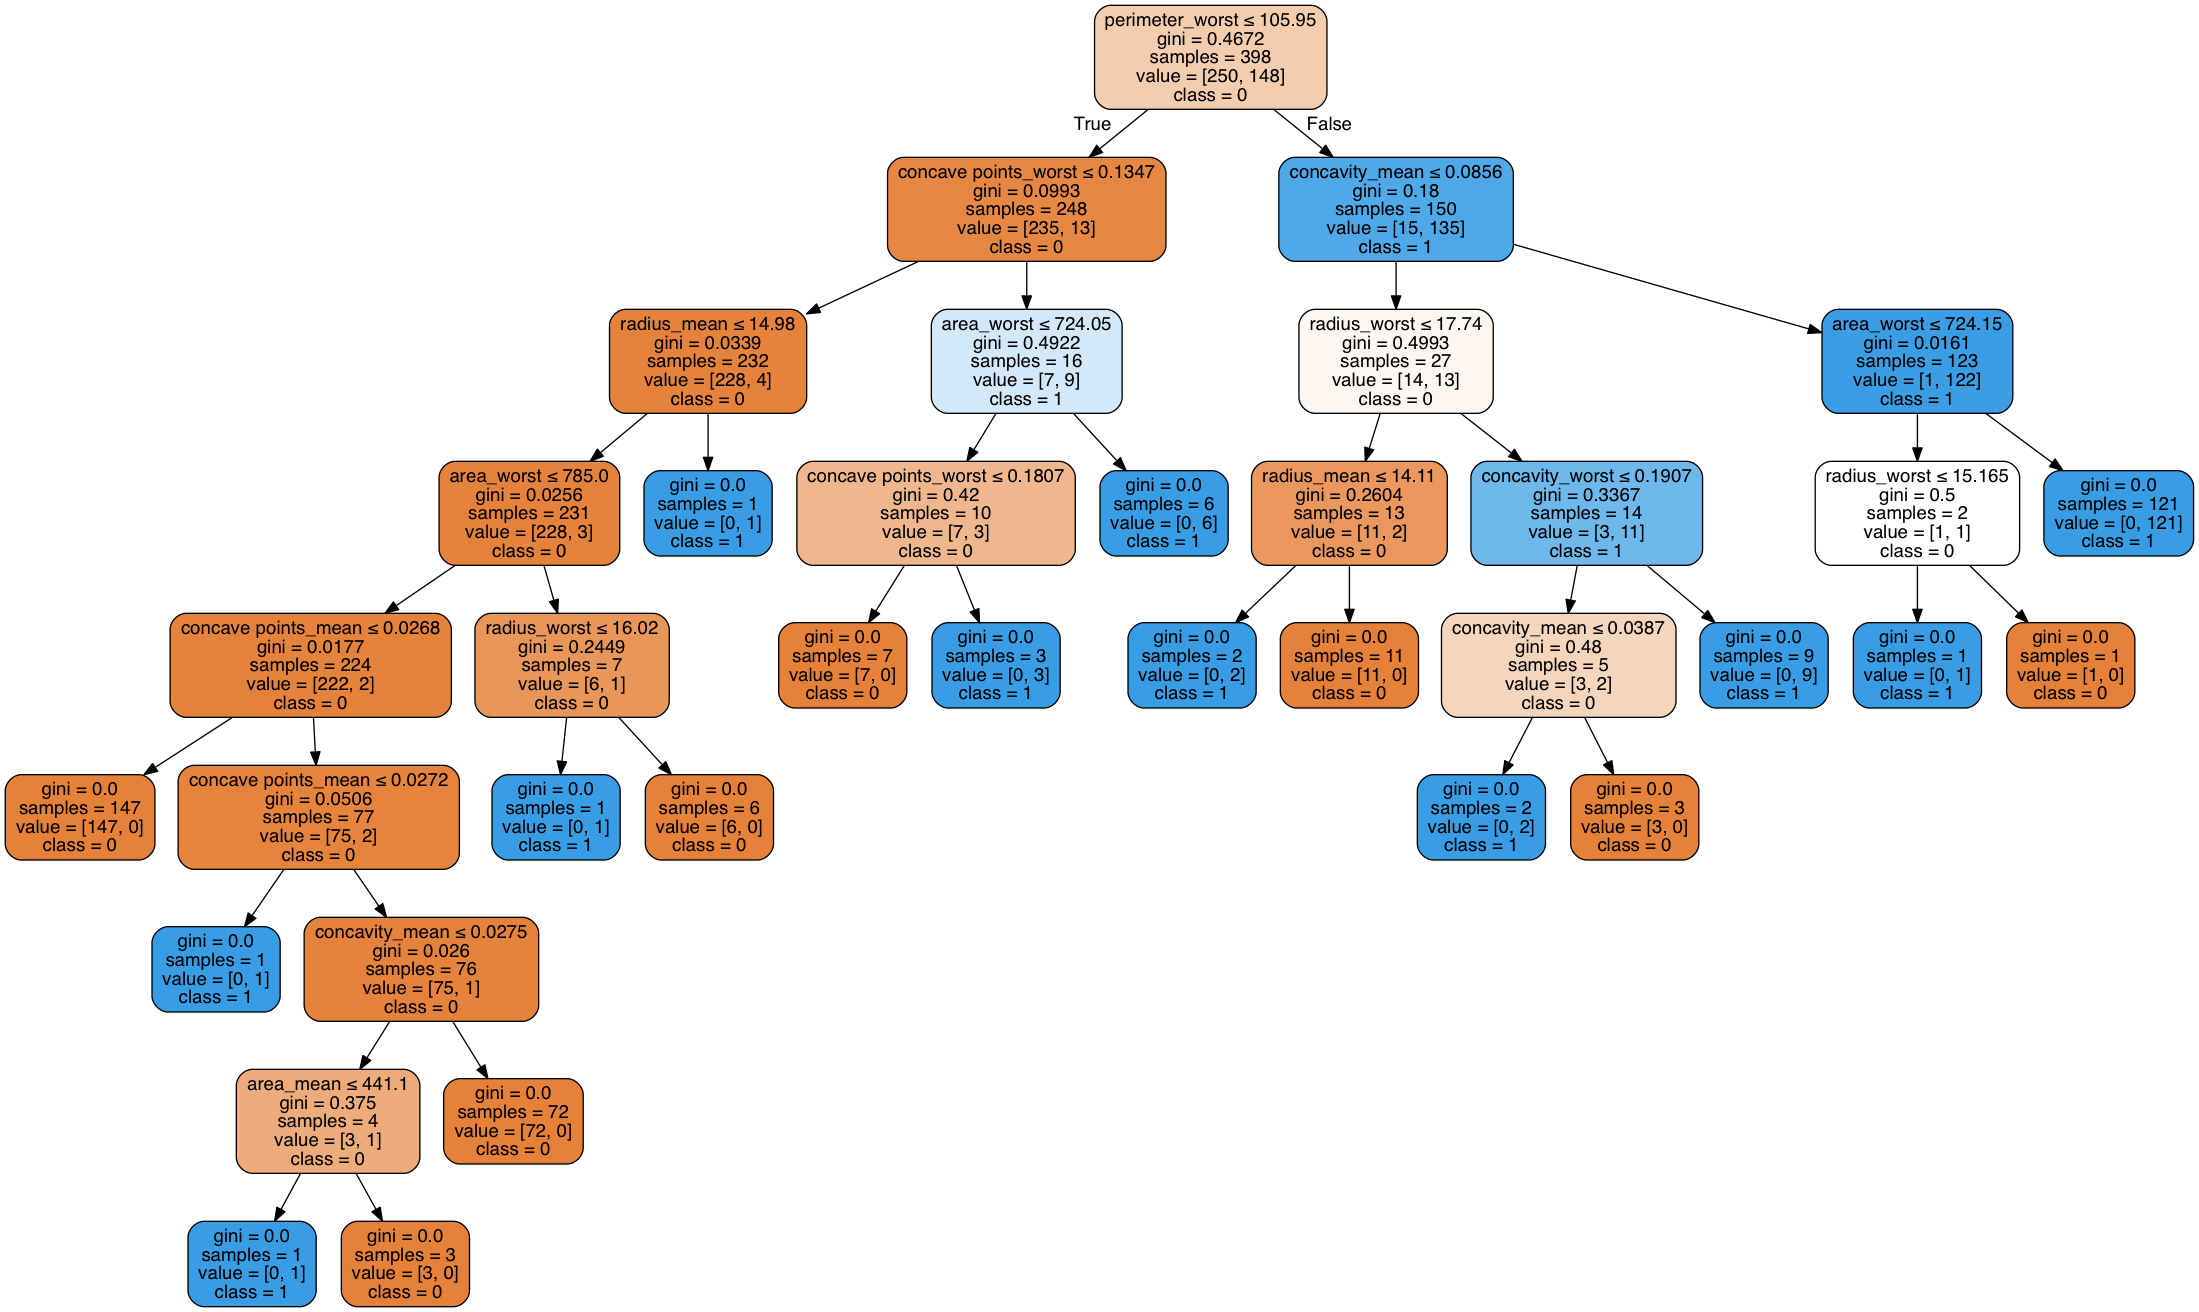

In [57]:
dot_data = export_graphviz(model, out_file=None, 
                         feature_names=feature_labels,  
                         class_names= ["0","1"], 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

### Random Forest

In [176]:
model = RandomForestClassifier(n_estimators = 1000,min_samples_split=25,max_depth=7,max_features=2)
classification_model(model,traindf,feature_labels,'diagnosis')


Accuracy : 96.482%
Cross-Validation Score : 95.000%
Cross-Validation Score : 92.500%
Cross-Validation Score : 93.333%
Cross-Validation Score : 93.125%
Cross-Validation Score : 91.500%
Cross-Validation Score : 92.500%
Cross-Validation Score : 92.857%
Cross-Validation Score : 93.125%
Cross-Validation Score : 92.749%
Cross-Validation Score : 93.474%


0.96482412060301503

### Support Vector Machine



In [177]:
from sklearn import svm
model = svm.SVC(kernel='linear',C=1)
classification_model(model,traindf,feature_labels,'diagnosis')


Accuracy : 96.482%
Cross-Validation Score : 92.500%
Cross-Validation Score : 93.750%
Cross-Validation Score : 94.167%
Cross-Validation Score : 95.000%
Cross-Validation Score : 94.000%
Cross-Validation Score : 94.583%
Cross-Validation Score : 95.000%
Cross-Validation Score : 95.000%
Cross-Validation Score : 94.701%
Cross-Validation Score : 95.231%


0.96482412060301503

### Naive Bayes

In [179]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
classification_model(model,traindf,feature_labels,'diagnosis')

Accuracy : 93.970%
Cross-Validation Score : 92.500%
Cross-Validation Score : 91.250%
Cross-Validation Score : 91.667%
Cross-Validation Score : 91.875%
Cross-Validation Score : 91.500%
Cross-Validation Score : 92.917%
Cross-Validation Score : 92.857%
Cross-Validation Score : 93.125%
Cross-Validation Score : 93.319%
Cross-Validation Score : 93.731%


0.93969849246231152

## Evaluating our Test Data Set


In [184]:
from sklearn import svm
model = svm.SVC(kernel='linear',C=1)
classification_model(model,testdf,feature_labels,'diagnosis')


Accuracy : 94.737%
Cross-Validation Score : 94.444%
Cross-Validation Score : 94.281%
Cross-Validation Score : 92.266%
Cross-Validation Score : 89.788%
Cross-Validation Score : 90.654%
Cross-Validation Score : 90.251%
Cross-Validation Score : 90.803%
Cross-Validation Score : 91.217%
Cross-Validation Score : 90.232%
Cross-Validation Score : 90.621%


0.94736842105263153